In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Data Reading

In [3]:
df= pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q3/train.csv")

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 81 columns):
Id               1000 non-null int64
MSSubClass       1000 non-null int64
MSZoning         1000 non-null object
LotFrontage      825 non-null float64
LotArea          1000 non-null int64
Street           1000 non-null object
Alley            50 non-null object
LotShape         1000 non-null object
LandContour      1000 non-null object
Utilities        1000 non-null object
LotConfig        1000 non-null object
LandSlope        1000 non-null object
Neighborhood     1000 non-null object
Condition1       1000 non-null object
Condition2       1000 non-null object
BldgType         1000 non-null object
HouseStyle       1000 non-null object
OverallQual      1000 non-null int64
OverallCond      1000 non-null int64
YearBuilt        1000 non-null int64
YearRemodAdd     1000 non-null int64
RoofStyle        1000 non-null object
RoofMatl         1000 non-null object
Exterior1st      1000 non-nul

In [7]:
df['LotFrontage'].unique()

array([ 99.,  89.,  32.,  30.,  nan,  36.,  68.,  70.,  60.,  50.,  58.,
       120.,  51.,  75.,  90.,  71., 144.,  64., 138.,  73.,  67., 134.,
        88.,  40.,  38., 168.,  94.,  80., 104.,  98.,  72.,  48., 130.,
        93.,  54.,  63.,  24., 105.,  35.,  69.,  85.,  81.,  21.,  83.,
       100.,  53.,  77.,  92.,  33., 129., 108.,  65.,  97.,  79.,  87.,
        55.,  66.,  44., 107.,  37., 115.,  78., 150., 110., 124.,  34.,
       153., 140.,  91.,  47.,  95.,  49., 174., 182.,  74.,  57.,  76.,
        61.,  52.,  59.,  84.,  62.,  45.,  86., 118.,  43.,  96., 121.,
       149., 103., 102., 313.,  82., 106.,  42.,  39., 101., 109., 116.,
        56., 111., 141.,  41., 160., 112.])

In [8]:
df['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [9]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', nan, 'BrkCmn'], dtype=object)

In [10]:
df['MasVnrArea'].unique()

array([3.880e+02, 0.000e+00, 4.430e+02, 7.600e+01, 1.060e+02, 3.200e+02,
       1.920e+02, 3.600e+01, 2.560e+02, 2.750e+02, 1.100e+02, 4.560e+02,
       3.500e+02, 4.150e+02, 1.440e+02, 1.170e+03, 2.000e+02, 6.400e+01,
       1.280e+02, 4.420e+02, 4.380e+02, 1.000e+02, 2.100e+02, 7.720e+02,
       1.510e+02, 1.800e+02, 5.600e+01,       nan, 2.660e+02, 4.730e+02,
       1.580e+02, 2.190e+02, 1.370e+02, 2.720e+02, 3.360e+02, 1.140e+02,
       6.210e+02, 1.650e+02, 4.200e+02, 2.450e+02, 9.800e+01, 9.200e+01,
       8.500e+01, 2.880e+02, 2.540e+02, 1.600e+03, 1.620e+02, 1.860e+02,
       1.740e+02, 1.450e+02, 1.780e+02, 3.200e+01, 3.480e+02, 4.400e+01,
       4.280e+02, 4.200e+01, 2.960e+02, 8.600e+01, 9.900e+01, 2.950e+02,
       3.350e+02, 1.760e+02, 8.400e+01, 3.120e+02, 2.630e+02, 1.200e+02,
       1.080e+02, 1.480e+02, 2.940e+02, 1.660e+02, 1.160e+02, 2.470e+02,
       2.430e+02, 3.680e+02, 6.000e+01, 2.520e+02, 3.760e+02, 1.320e+02,
       2.090e+02, 3.870e+02, 2.320e+02, 3.240e+02, 

In [11]:
df['BsmtQual'].unique()

array(['Ex', 'Gd', 'TA', nan, 'Fa'], dtype=object)

In [12]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [13]:
df['BsmtExposure'].unique()

array(['Av', 'Gd', 'No', nan, 'Mn'], dtype=object)

In [14]:
df['BsmtFinType1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'BLQ', nan, 'Rec', 'LwQ'], dtype=object)

In [15]:
df['BsmtFinType2'].unique()

array(['Unf', 'LwQ', nan, 'BLQ', 'Rec', 'ALQ', 'GLQ'], dtype=object)

In [16]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', nan, 'Mix'], dtype=object)

In [17]:
df['FireplaceQu'].unique()

array(['Gd', nan, 'TA', 'Ex', 'Fa', 'Po'], dtype=object)

In [18]:
df['GarageType'].unique()

array(['BuiltIn', 'Attchd', 'Detchd', nan, 'Basment', 'CarPort', '2Types'],
      dtype=object)

In [19]:
df['GarageYrBlt'].unique()

array([2004., 2009., 1998., 1962., 2003., 1993., 1956., 1958.,   nan,
       2000., 1969., 1940., 1975., 1995., 2006., 2008., 1923., 1979.,
       2007., 2002., 2010., 1950., 1957., 1989., 1941., 1996., 1963.,
       1971., 1994., 1959., 1960., 1988., 1970., 1968., 1930., 1976.,
       1980., 1955., 1910., 1932., 1987., 1953., 1990., 1966., 1986.,
       1972., 1974., 1973., 1920., 1964., 1985., 1997., 2001., 1981.,
       1948., 1965., 1954., 1961., 1967., 1926., 1947., 1999., 2005.,
       1925., 1978., 1983., 1916., 1921., 1929., 1951., 1942., 1922.,
       1977., 1949., 1945., 1938., 1918., 1992., 1924., 1934., 1939.,
       1982., 1931., 1991., 1984., 1914., 1935., 1936., 1928., 1946.,
       1900., 1952., 1933.])

In [20]:
df['GarageFinish'].unique()

array(['Fin', 'RFn', 'Unf', nan], dtype=object)

In [21]:
df['GarageQual'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [22]:
df['GarageCond'].unique()

array(['TA', nan, 'Po', 'Fa', 'Gd', 'Ex'], dtype=object)

In [23]:
df['PoolQC'].unique()

array([nan, 'Fa', 'Ex', 'Gd'], dtype=object)

In [24]:
df['Fence'].unique()

array([nan, 'MnPrv', 'MnWw', 'GdWo', 'GdPrv'], dtype=object)

In [47]:
# Data Cleaning

In [48]:
x = df['LotFrontage'].mode()
df['LotFrontage'].fillna(x[0],inplace = True)
df['Alley'].fillna("No Alley",inplace= True)
x = df['MasVnrType'].mode()
df['MasVnrType'].fillna(x[0],inplace = True)
x = df['MasVnrArea'].mean()
df['MasVnrArea'].fillna(x,inplace = True)
df['BsmtQual'].fillna("NB",inplace = True)
df['BsmtCond'].fillna("NB",inplace = True)
df['BsmtExposure'].fillna("NB",inplace = True)
df['BsmtFinType1'].fillna("NB",inplace = True)
df['BsmtFinType2'].fillna("NB",inplace = True)
x = df['Electrical'].mode()
df['Electrical'].fillna(x[0],inplace=True)
df['FireplaceQu'].fillna("NF",inplace=True)
df['GarageType'].fillna("NG",inplace=True)
df['GarageYrBlt'].fillna(0,inplace=True)
df['GarageFinish'].fillna("NG",inplace=True)
df['GarageQual'].fillna("NG",inplace=True)
df['GarageCond'].fillna("NG",inplace=True)
df['PoolQC'].fillna("NP",inplace=True)
df['Fence'].fillna("NP",inplace=True)
df= df.drop(columns=['MiscFeature'])

# Identifying Categorical and Contiguous Data

In [50]:
cont=[] ##cont == 1 means continuous else categorical
n = df.shape;
for i in range(0,n[1]):
    l = df.iloc[:,i].unique()
    x =len(l)
    if(x > 25):
        cont.append(1)
    else:
        cont.append(0)

# Data Spliting (Training Data (80%) & Validation Data (20%))

In [69]:
msk = np.random.rand(len(df)) < 0.2

training_df = df[~msk]
validation_df= df[msk]

training_shape = training_df.shape
validation_shape= validation_df.shape

print(training_df.shape)
print(validation_df.shape)

(799, 80)
(201, 80)


# Main Function

In [108]:
class Node():
    def __init__(self):
        self.left = None
        self.right = None
        self.attrvalue=None
        self.type = None
        self.thr = None
        self.data = None
        
class Tree(object):
    def __init__(self,df,depth):
        self.root = self.buildtree(df,depth,0)
    
    def buildtree(self,df,depth,countt):
        x = len(df)
        if(depth == countt or x < 10):
            node = Node()
            node.data = df['SalePrice'].mean()
            return node
        
        splitpoint = bestfit(df)
#         print(splitpoint,countt)
        
        if(splitpoint[0] == -1):
            node = Node()
            node.data = df['SalePrice'].mean()
            return node
        
        node = Node()
        node.attrvalue = splitpoint[1]
        node.thr = splitpoint[2]
        node.type = cont[splitpoint[1]]
        
        #split
        small=None
        big= None
        if(node.type == 1):
            small = df[df.iloc[:,node.attrvalue] < node.thr]
            big = df[df.iloc[:,node.attrvalue] >= node.thr]
        else:
            small = df[df.iloc[:,node.attrvalue] == node.thr]
            big = df[df.iloc[:,node.attrvalue] != node.thr]
        
        n = len(small)
        m = len(big)
        if(n==0 or m==0):
            node = Node()
            node.data = df['SalePrice'].mean()
            return node
        
        node.left = self.buildtree(small,depth,countt+1)
        node.right = self.buildtree(big,depth,countt+1)
        
        return node
    
    def traverse(self,root,test_df,index,countt):
        if(root.left == None and root.right == None):
            return root.data

        attribute = root.attrvalue
        feature_value = root.thr    

        if(root.type == 1):
            if(test_df.iloc[index,attribute] < feature_value):
                return self.traverse(root.left,test_df,index,countt+1)
            else:
                return self.traverse(root.right,test_df,index,countt+1)
        else:
            if(test_df.iloc[index,attribute] == feature_value):
                return self.traverse(root.left,test_df,index,countt+1)
            else:
                return self.traverse(root.right,test_df,index,countt+1)

        return None

# Helper Functions

In [62]:
def getmin(temp):
    mm = temp[0][0]
    index = 0;
    for i in range(1,len(temp)):
        if(temp[i][0] < mm):
            index = i
            mm = temp[i][0]
    return index

def calculate(temp):
    meanoftemp = temp.mean()
    temp1 = temp-meanoftemp
    temp2 = np.power(temp1,2)
    temp3 = temp2.sum()//len(temp)
    temp4 = np.sqrt(temp3)
    return temp4
    
def getsplit(new_df,index,featurevalue):
    if(cont[index] == 1):
#         print(featurevalue)
        small = new_df[new_df.iloc[:,index] < featurevalue]
        big = new_df[new_df.iloc[:,index] >= featurevalue]
        return small,big
    else:
        small = new_df[new_df.iloc[:,index] == featurevalue]
        big = new_df[new_df.iloc[:,index] != featurevalue]
        return small,big

def getbestfit(new_df,index): #index = feature index
    attrvalues = new_df.iloc[:,index].unique()
    temp = []
    xx = (-1)
    for i in attrvalues: # for all values of given feature calculate bestfit value
        small , big = getsplit(new_df,index,i) #split the data into two parts
        if(len(small) > 5 and len(big) > 5):
            x= calculate(small['SalePrice'])
            y = calculate(big['SalePrice'])
            result = ( (x*len(small))/(len(small)+len(big)) + (y*len(big))/(len(small)+len(big)) )
            temp.append([result,i])
#     print(temp)
    if(len(temp)!=0):
        xx = getmin(temp)
    if(xx == -1):
        return [-1,-1]
    return temp[xx] # returns features best value

def bestfit(new_df):
    nn = new_df.shape
    localfit = [] #storing minvalue for each feature
    for i in range(1,nn[1]-1):
        minvalue,feature_value = getbestfit(new_df,i) # pass df and feature index
        if(feature_value == -1):
            continue
        localfit.append([minvalue,i,feature_value])
#         print([minvalue,i,feature_value])
#     print(localfit)
    xx = len(localfit)
    if(xx == 0):
        return [-1,-1,-1]
#     print(localfit)
    index = getmin(localfit)
    return localfit[index] # returns best fit for given dataframe [minvalue,feature,feature_value]

# Build Tree for Training Data

In [64]:
# Depth = 5
depth5 = Tree(training_df,5)

[60173.044557804635, 46, 1525] 0
[29710.985337418064, 19, 1985] 1
[25530.815784643375, 38, 1008] 2
[23275.131609593056, 59, 1921.0] 3
[22450.420010039652, 43, 694] 4
[20366.391875239915, 34, 360] 4
[19475.915689887734, 4, 8400] 3
[10460.528651016655, 19, 1955] 4
[18425.793613947466, 56, 0] 4
[22165.461005403355, 46, 1146] 2
[12544.188739908834, 61, 2] 3
[6972.497038743251, 76, 2008] 4
[18088.211102049172, 38, 1470] 3
[13919.98551353152, 38, 1241] 4
[70201.11814543919, 61, 3] 1
[83508.4727620674, 46, 2728] 2
[57538.15499178309, 34, 1320] 3
[50181.02559165444, 46, 2262] 4
[41608.14307903943, 4, 13478] 4
[140273.18726388912, 30, 'Ex'] 3
[47065.95752351725, 27, 'TA'] 2
[37490.18641322781, 4, 11029] 3
[25926.880571089278, 50, 1] 4
[38379.02463903595, 56, 2] 4
[41093.599497411924, 43, 1091] 3
[21959.218391448863, 15, '1Fam'] 4
[42754.37548348362, 46, 1644] 4


In [79]:
#depth = 7
depth7 = Tree(training_df,7)

[60270.258807006874, 46, 1493] 0
[28456.899136655644, 19, 1986] 1
[25364.215186085232, 19, 1953] 2
[24777.93452972774, 41, 'N'] 3
[20908.85643690296, 4, 8765] 4
[19222.873038309463, 59, 1926.0] 5
[-1, -1, -1] 6
[14094.29518213489, 46, 986] 6
[-1, -1, -1] 5
[22544.512656502982, 1, 30] 4
[18708.559243279833, 59, 1921.0] 5
[16665.261129218656, 68, 44] 6
[18838.639460788516, 46, 1385] 5
[17050.953962303854, 12, 'Edwards'] 6
[20150.11960523795, 38, 938] 3
[15899.500527999804, 62, 299] 4
[13185.654805054906, 43, 864] 5
[12645.188050574827, 51, 2] 6
[7685.0519616671445, 34, 111] 6
[12012.490165759958, 17, 6] 5
[9233.506973839629, 66, 188] 6
[9028.98801321457, 34, 384] 6
[18841.206554479882, 4, 8544] 4
[9409.251641460107, 37, 108] 5
[9025.725302595321, 38, 1060] 6
[19798.56578666673, 17, 6] 5
[12094.792122266237, 37, 426] 6
[20284.23580327583, 28, 'TA'] 6
[18440.451798213002, 46, 1146] 2
[14284.543809512646, 67, 49] 3
[5525.116497553914, 19, 2004] 4
[15482.113816741235, 38, 1240] 3
[9284.94015

In [80]:
#depth = 8
depth8 = Tree(training_df,8)

[60270.258807006874, 46, 1493] 0
[28456.899136655644, 19, 1986] 1
[25364.215186085232, 19, 1953] 2
[24777.93452972774, 41, 'N'] 3
[20908.85643690296, 4, 8765] 4
[19222.873038309463, 59, 1926.0] 5
[-1, -1, -1] 6
[14094.29518213489, 46, 986] 6
[-1, -1, -1] 7
[-1, -1, -1] 5
[22544.512656502982, 1, 30] 4
[18708.559243279833, 59, 1921.0] 5
[16665.261129218656, 68, 44] 6
[-1, -1, -1] 7
[-1, -1, -1] 7
[18838.639460788516, 46, 1385] 5
[17050.953962303854, 12, 'Edwards'] 6
[-1, -1, -1] 7
[13650.451689611578, 20, 1951] 7
[20150.11960523795, 38, 938] 3
[15899.500527999804, 62, 299] 4
[13185.654805054906, 43, 864] 5
[12645.188050574827, 51, 2] 6
[7685.0519616671445, 34, 111] 6
[6065.899049534215, 54, 5] 7
[12012.490165759958, 17, 6] 5
[9233.506973839629, 66, 188] 6
[9028.98801321457, 34, 384] 6
[7588.913428280719, 66, 96] 7
[7441.383596027104, 47, 1] 7
[18841.206554479882, 4, 8544] 4
[9409.251641460107, 37, 108] 5
[9025.725302595321, 38, 1060] 6
[7556.265967028741, 47, 1] 7
[7283.989767361369, 33,

In [82]:
#depth = 10
depth10 = Tree(training_df,10)

[60270.258807006874, 46, 1493] 0
[28456.899136655644, 19, 1986] 1
[25364.215186085232, 19, 1953] 2
[24777.93452972774, 41, 'N'] 3
[20908.85643690296, 4, 8765] 4
[19222.873038309463, 59, 1926.0] 5
[-1, -1, -1] 6
[14094.29518213489, 46, 986] 6
[-1, -1, -1] 7
[-1, -1, -1] 5
[22544.512656502982, 1, 30] 4
[18708.559243279833, 59, 1921.0] 5
[16665.261129218656, 68, 44] 6
[-1, -1, -1] 7
[-1, -1, -1] 7
[18838.639460788516, 46, 1385] 5
[17050.953962303854, 12, 'Edwards'] 6
[-1, -1, -1] 7
[13650.451689611578, 20, 1951] 7
[12337.978539108284, 57, 'Gd'] 8
[-1, -1, -1] 9
[8682.063305462169, 40, 'TA'] 9
[7068.341427574125, 59, 1985.0] 8
[20150.11960523795, 38, 938] 3
[15899.500527999804, 62, 299] 4
[13185.654805054906, 43, 864] 5
[12645.188050574827, 51, 2] 6
[7685.0519616671445, 34, 111] 6
[6065.899049534215, 54, 5] 7
[12012.490165759958, 17, 6] 5
[9233.506973839629, 66, 188] 6
[9028.98801321457, 34, 384] 6
[7588.913428280719, 66, 96] 7
[7441.383596027104, 47, 1] 7
[6848.630474340749, 43, 894] 8
[1

In [ ]:
# R2 Score for different Depths on Validation data

In [ ]:
resultdepth5=[]
resultdepth7=[]
resultdepth8=[]
resultdepth10=[]

# drop label
validation_label = list(validation_df['SalePrice'])
test = validation_df.drop(columns=['SalePrice'])
x=validation_shape[0]

for i in range(0,x):
    temp = depth5.traverse(depth5.root,test,i,0)
    resultdepth5.append(temp)
    temp = depth7.traverse(depth7.root,test,i,0)
    resultdepth7.append(temp)
    temp = depth8.traverse(depth8.root,test,i,0)
    resultdepth8.append(temp)
    temp = depth10.traverse(depth10.root,test,i,0)
    resultdepth10.append(temp)
    
    
# d1 = pd.DataFrame(result)
# type(validation_label)
# validation_df.head()

In [104]:
r2score=[]
mean_absolute=[]
mean_squad=[]
r2score.append(r2_score(validation_label,resultdepth5))
r2score.append(r2_score(validation_label,resultdepth7))
r2score.append(r2_score(validation_label,resultdepth8))
r2score.append(r2_score(validation_label,resultdepth10))

mean_absolute.append(mean_absolute_error(validation_label,resultdepth5))
mean_absolute.append(mean_absolute_error(validation_label,resultdepth7))
mean_absolute.append(mean_absolute_error(validation_label,resultdepth8))
mean_absolute.append(mean_absolute_error(validation_label,resultdepth10))

mean_squad.append(mean_squared_error(validation_label,resultdepth5))
mean_squad.append(mean_squared_error(validation_label,resultdepth7))
mean_squad.append(mean_squared_error(validation_label,resultdepth8))
mean_squad.append(mean_squared_error(validation_label,resultdepth10))


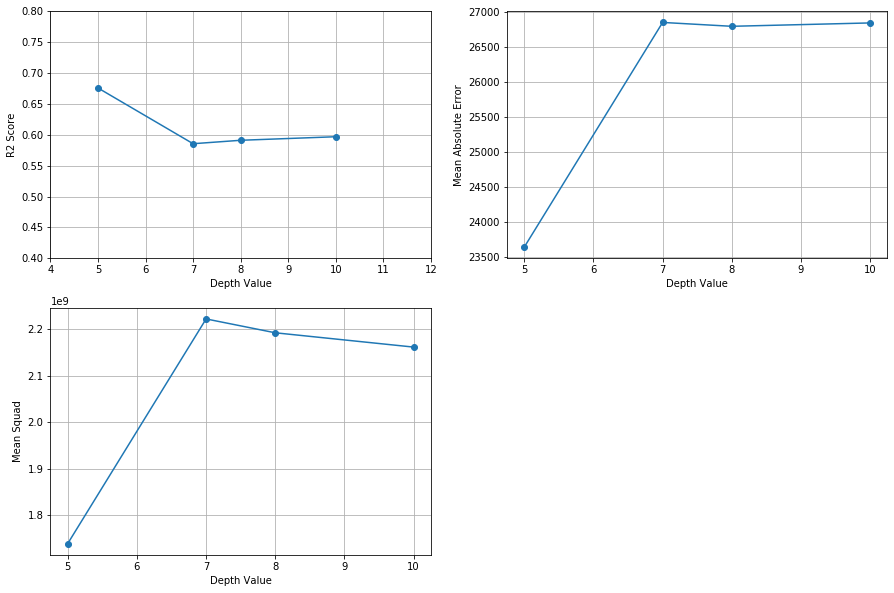

In [106]:
depth=[5,7,8,10]
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.axis([4, 12, 0.4, 0.8])
plt.plot(depth,r2score,marker='o')
plt.xlabel("Depth Value")
plt.ylabel("R2 Score")
plt.grid()

plt.subplot(2,2,2)
plt.plot(depth,mean_absolute,marker='o')
plt.xlabel("Depth Value")
plt.ylabel("Mean Absolute Error")
plt.grid()

plt.subplot(2,2,3)
plt.plot(depth,mean_squad,marker='o')
plt.xlabel("Depth Value")
plt.ylabel("Mean Squad")
plt.grid()
plt.show()

In [110]:
# Test Data

In [112]:
test_df = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q3/test.csv")

In [113]:
x = test_df['LotFrontage'].mode()
test_df['LotFrontage'].fillna(x[0],inplace = True)
test_df['Alley'].fillna("No Alley",inplace= True)
x = test_df['MasVnrType'].mode()
test_df['MasVnrType'].fillna(x[0],inplace = True)
x = test_df['MasVnrArea'].mean()
test_df['MasVnrArea'].fillna(x,inplace = True)
test_df['BsmtQual'].fillna("NB",inplace = True)
test_df['BsmtCond'].fillna("NB",inplace = True)
test_df['BsmtExposure'].fillna("NB",inplace = True)
test_df['BsmtFinType1'].fillna("NB",inplace = True)
test_df['BsmtFinType2'].fillna("NB",inplace = True)
x = test_df['Electrical'].mode()
test_df['Electrical'].fillna(x[0],inplace=True)
test_df['FireplaceQu'].fillna("NF",inplace=True)
test_df['GarageType'].fillna("NG",inplace=True)
test_df['GarageYrBlt'].fillna(0,inplace=True)
test_df['GarageFinish'].fillna("NG",inplace=True)
test_df['GarageQual'].fillna("NG",inplace=True)
test_df['GarageCond'].fillna("NG",inplace=True)
test_df['PoolQC'].fillna("NP",inplace=True)
test_df['Fence'].fillna("NP",inplace=True)
test_df= test_df.drop(columns=['MiscFeature'])

In [116]:
df_depth5 = Tree(df,5)
df_depth7 = Tree(df,7)
df_depth8 = Tree(df,8)
df_depth10 = Tree(df,10)


In [118]:
test_label = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q3/test_labels.csv",header=None,index_col=0)
test_result5=[]
test_result7=[]
test_result8=[]
test_result10=[]
x=len(test_df)
for i in range(0,x):
    temp = depth5.traverse(df_depth5.root,test_df,i,0)
    test_result5.append(temp)
    temp = depth7.traverse(df_depth7.root,test_df,i,0)
    test_result7.append(temp)
    temp = depth8.traverse(df_depth8.root,test_df,i,0)
    test_result8.append(temp)
    temp = depth10.traverse(df_depth10.root,test_df,i,0)
    test_result10.append(temp)

test_r2score=[]
test_mean_absolute=[]
test_mean_squad=[]
test_r2score.append(r2_score(test_label,test_result5))
test_r2score.append(r2_score(test_label,test_result7))
test_r2score.append(r2_score(test_label,test_result8))
test_r2score.append(r2_score(test_label,test_result10))

test_mean_absolute.append(mean_absolute_error(test_label,test_result5))
test_mean_absolute.append(mean_absolute_error(test_label,test_result7))
test_mean_absolute.append(mean_absolute_error(test_label,test_result8))
test_mean_absolute.append(mean_absolute_error(test_label,test_result10))

test_mean_squad.append(mean_squared_error(test_label,test_result5))
test_mean_squad.append(mean_squared_error(test_label,test_result7))
test_mean_squad.append(mean_squared_error(test_label,test_result8))
test_mean_squad.append(mean_squared_error(test_label,test_result10))

0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3


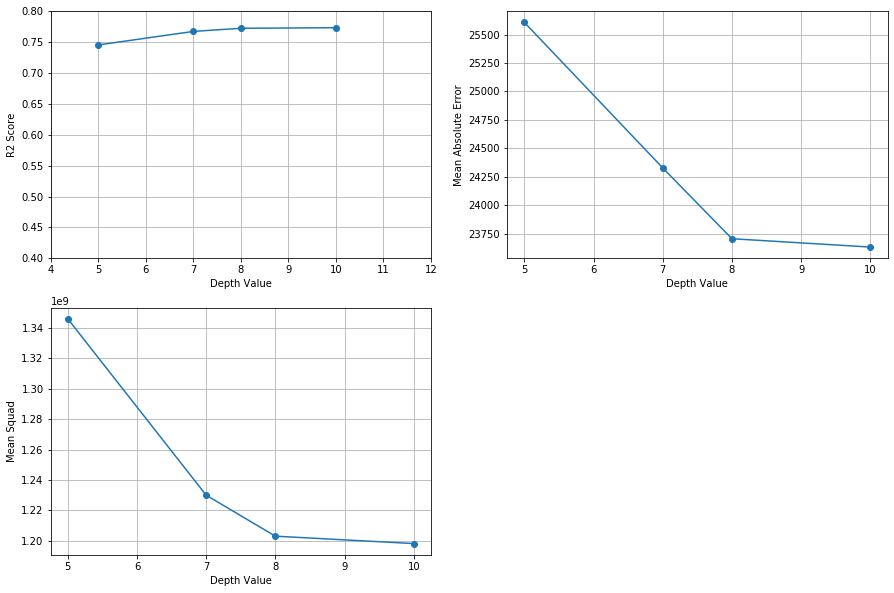

In [119]:
depth=[5,7,8,10]
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.axis([4, 12, 0.4, 0.8])
plt.plot(depth,test_r2score,marker='o')
plt.xlabel("Depth Value")
plt.ylabel("R2 Score")
plt.grid()

plt.subplot(2,2,2)
plt.plot(depth,test_mean_absolute,marker='o')
plt.xlabel("Depth Value")
plt.ylabel("Mean Absolute Error")
plt.grid()

plt.subplot(2,2,3)
plt.plot(depth,test_mean_squad,marker='o')
plt.xlabel("Depth Value")
plt.ylabel("Mean Squad")
plt.grid()
plt.show()

# Baseline Comparison

In [193]:
baseline_result=[]
for i in range(0,len(test_df)):
    baseline_result.append(df['SalePrice'].mean())

a = mean_absolute_error(test_label,baseline_result)
b = mean_squared_error(test_label,baseline_result)
c = r2_score(test_label,baseline_result)

In [195]:
print("r2 score: ",a)
print("mean absolute error:",b)
print("mean squad error:",c)

r2 score:  54656.09460869566
mean absolute error: 5322462690.052036
mean squad error: -0.007125647313121597


# Decision Tree Sklearn Comparison

In [178]:
from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import score
from sklearn.preprocessing import LabelEncoder
sklearn_r2score = []
sklearn_mean_absolute=[]
sklearn_mean_squad=[]

def sklearndecision(k):
    test_label = pd.read_csv("/home/pratik/Downloads/Assignment1 Dataset/Datasets/q3/test_labels.csv",header=None,index_col=0)
    tt = LabelEncoder()
    test_dff = test_df.copy()
    x = test_dff.shape
    ddf = df.copy()
    
    label = ddf['SalePrice']
    ddf.drop(columns=['SalePrice'],inplace=True,axis=1)
    
    for i in range(0,len(cont)-1):
        if(cont[i] == 0):
            test_dff.iloc[:,i] = tt.fit_transform(test_dff.iloc[:,i])
            ddf.iloc[:,i] = tt.fit_transform(ddf.iloc[:,i])
            
    decisionsklearn = DecisionTreeRegressor(random_state = 0,max_depth=k)
    decisionsklearn.fit(ddf,label)
    
    pred = decisionsklearn.predict(test_dff)
    
    sklearn_mean_absolute.append(mean_absolute_error(test_label,pred))
    sklearn_mean_squad.append(mean_squared_error(test_label,pred))
    sklearn_r2score.append(r2_score(test_label,pred))


In [179]:
sklearndecision(5)
sklearndecision(7)
sklearndecision(8)
sklearndecision(10)


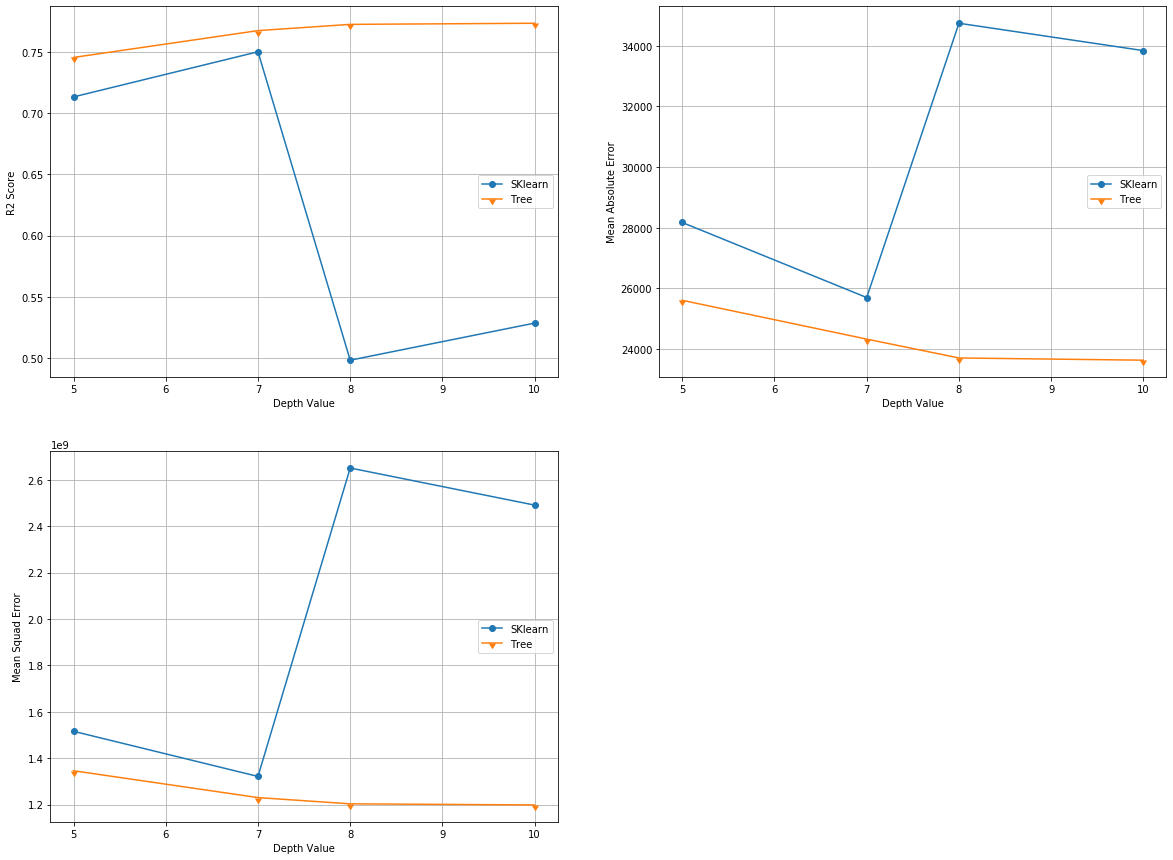

In [187]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(depth, sklearn_r2score,label="SKlearn",marker='o')
plt.plot(depth,test_r2score,label="Tree",marker=11)
plt.xlabel("Depth Value")
plt.ylabel("R2 Score")
plt.legend(loc="center right")
plt.grid(True)
plt.subplot(2,2,2)
plt.plot(depth, sklearn_mean_absolute,label="SKlearn",marker='o')
plt.plot(depth,test_mean_absolute,label="Tree",marker=11)
plt.xlabel("Depth Value")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="center right")
plt.grid(True)
plt.subplot(2,2,3)
plt.plot(depth, sklearn_mean_squad,label="SKlearn",marker='o')
plt.plot(depth,test_mean_squad,label="Tree",marker=11)
plt.xlabel("Depth Value")
plt.ylabel("Mean Squad Error")
plt.legend(loc="center right")
plt.grid(True)
plt.show()